## Cereal Rating Analysis

**Meta-Data** of the Cereals Dataset:

*   name: cereal name 
*   mfr: Manufacturers are represented by their first initial: A=American Home Food Products, G=General Mills, K=Kelloggs, N=Nabisco, P=Post, Q=Quaker Oats, R=Ralston Purina)
*   type: type (cold/hot)
*   calories: calories (number) 
*   protein: protein(g) 
*   fat: fat(g) 
*   sodium: sodium(mg) 
*   fiber: dietary fiber(g) 
*   carbo: complex carbohydrates(g) 
*   sugars: sugars(g) 
*   shelf: display shelf (1, 2, or 3, counting from the floor) 
*   potass: potassium(mg) 
*   vitamins: vitamins & minerals (0, 25, or 100, respectively indicating 'none added'; 'enriched, often to 25% FDA recommended'; '100% of FDA recommended')
*   weight: weight (in ounces) of one serving (serving size) 
*   cups: cups per serving 
*   rating: health rating of the cereal out of 100

First, we import the libraries:

*   NumPy - for data manipulation.
*   Pandas - for data manipulation.
*   MatPlotLib - for data visualization.
*   Seaborn - for data visualization.
*   SciPy - for correlation stats.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

Next, we read the excel file into a Pandas dataframe using the function read_excel() from the Pandas library.

In [3]:
# reading the dataset
df = pd.read_excel('Cereals.xls')

After reading the dataset, we view the first few rows of the dataframe using the head() function from the Pandas library.

In [5]:
# viewing the first few rows of the dataset
# the head() function displays the first 5 rows of the dataframe
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


Now, we start answering the lab questions.

#### **Q1.** Create a table with the 5-number summary of all the nutrients.

To solve Question 1, we use the describe() function from the Pandas library on the columns protein, fat, carbo, vitamins, sodium, sugars, potass and fiber. 

In [7]:
# selecting only the nutrients and displaying the five number summary
df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber']].describe()

,protein,fat,carbo,vitamins,sodium,sugars,potass,fiber
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,14.723684,28.289474,160.065789,6.934211,93.657895,2.048684
std,1.089020,1.013159,4.160444,22.487813,84.318813,4.473136,68.502565,2.219038
min,1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,12.000000,25.000000,132.500000,3.000000,40.000000,0.750000
50%,2.500000,1.000000,14.500000,25.000000,180.000000,7.000000,90.000000,1.750000
75%,3.000000,2.000000,17.000000,25.000000,212.500000,11.000000,120.000000,3.000000
max,6.000000,5.000000,23.000000,100.000000,320.000000,15.000000,330.000000,14.000000


In [9]:
df.replace(-1,np.nan,inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [48]:
df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber']].describe()

,protein,fat,carbo,vitamins,sodium,sugars,potass,fiber
count,76.000000,76.000000,75.000000,76.000000,76.000000,75.000000,74.000000,76.000000
mean,2.526316,1.013158,14.933333,28.289474,160.065789,7.040000,96.216216,2.048684
std,1.089020,1.013159,3.762666,22.487813,84.318813,4.406506,67.594737,2.219038
min,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,12.000000,25.000000,132.500000,3.000000,41.250000,0.750000
50%,2.500000,1.000000,15.000000,25.000000,180.000000,7.000000,90.000000,1.750000
75%,3.000000,2.000000,17.000000,25.000000,212.500000,11.000000,120.000000,3.000000
max,6.000000,5.000000,23.000000,100.000000,320.000000,15.000000,330.000000,14.000000


As we can see, the minimum values of carbo, sugars and potass is -1, which cannot be possible in a real-life scenario. This is caused by the presence of null values which are represented by -1 in our dataset. Hence, we must deal with them and then do our analysis.

#### **Q2.**  For each of the numeric attributes (proteins upto vitamins) , identify and replace all missing data(indicated with -1) with the arithmetic mean of the attribute.

To solve Question 2, we use the mask() function from the Pandas library. This function first replaces -1 with NA and then fills them with the mean of the rest of the data using the mean() function from the Pandas library.

In [11]:
# filling values -1 with mean
df.fillna(df.mean(numeric_only=True),inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


#### **Q3.**  Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective? 

To solve Question 3, we use the describe() function from the Pandas library on the columns protein, fat, carbo, vitamins, sodium, sugars, potass and fiber. 

In [13]:
# selecting only the numeric datatypes and displaying the five number summary
df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber']].describe()

,protein,fat,carbo,vitamins,sodium,sugars,potass,fiber
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,14.933333,28.289474,160.065789,7.040000,96.216216,2.048684
std,1.089020,1.013159,3.737498,22.487813,84.318813,4.377031,66.687384,2.219038
min,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,12.000000,25.000000,132.500000,3.000000,43.750000,0.750000
50%,2.500000,1.000000,14.966667,25.000000,180.000000,7.000000,90.000000,1.750000
75%,3.000000,2.000000,17.000000,25.000000,212.500000,11.000000,120.000000,3.000000
max,6.000000,5.000000,23.000000,100.000000,320.000000,15.000000,330.000000,14.000000


As we can see, the minimum values of carbo, sugars and potass are now 7, 0, and 15 respectively. This is possible in real life. Hence, the strategy in dealing with the missing values was effective. However, we see that the maximum values of the columns protein, vitamins, potass and fiber and the minimum values of the columns vitamins and sodium are not on the scale of the Q1, Q2, and Q3 values of the respective columns. This indicates the presence of outliers in the data. Hence, we must deal with them and do our analysis.

#### **Q4.** For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute. 

To solve Question 5, we loop over the nutrient columns and find out the Q1, Q2, Q3 and IQR values from the data columns using the quantile() and median() functions from the NumPy and Pandas libraries and then calculate the lower and upper bounds. After that, we replace the outliers, which are outside the lower and upper bounds, with the median of the data using the where() function from the NumPy library.

In [54]:
# replacing the outliers with median
for column in df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber']]:
    
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    q2 = df[column].median()
    
    df[column] = np.where(df[column]>upper_bound, q2, df[column])
    df[column] = np.where(df[column]<lower_bound, q2, df[column])

#### **Q5.** Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was  effective?

To solve Question 5, we use the describe() function from the Pandas library on the columns protein, fat, carbo, vitamins, sodium, sugars, potass and fiber.

In [100]:
# selecting only the numeric datatypes and displaying the five number summary
df.iloc[:,3:12].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,107.368421,2.401316,1.013158,181.381579,1.792105,14.933333,7.040000,85.821479,25.0
std,19.139378,0.875670,1.013159,60.186370,1.520220,3.737498,4.377031,48.062504,0.0
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.966667,7.000000,90.000000,25.0
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0


As we can see, the minimum and maximum values are now within the scale of the Q1, Q2, and Q3 values of all the columns. Hence, the strategy of dealing with outliers was effective.

Hence, the data has now been pre-processed - we have replaced the missing values with the mean of the data and the outliers with the median of the data. Now, we will proceed with the analysis.

#### **Q6.** Cross tabulate the type of cereal (hot vs cold) against the manufacturer

To solve Question 6, we use the crosstab() function from the Pandas library and pass the columns mfr and type.

In [58]:
# cross-tabulation
pd.crosstab(df.mfr, df.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


As we can see, there are:
*   0 cold and 1 hot cereals that American Home Food Products sells.
*   22 cold and 0 hot cereals that General Mills sells.
*   23 cold and 0 hot cereals that Kelloggs sells.
*   4 cold and 1 hot cereals that Nabisco sells.
*   9 cold and 0 hot cereals that Post sells.
*   7 cold and 1 hot cereals that Quaker Oats sells.
*   8 cold and 0 hot cereals that Ralston Purina sells.

#### **Q7.** Which is the cereal with the best rating, worst rating?

To solve part a of Question 7, we filter the dataframe with the condition that the rating observation matches the maximum value of the rating. In this filtered dataframe, we check the observation in the name column. 

In [60]:
# best rating
df[df.rating==df.rating.max()].name

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

As we can see, All-Bran_with_Extra_Fiber has the best rating.

To solve part b of Question 7, we filter the dataframe with the condition that the rating observation matches the minimum value of the rating. In this filtered dataframe, we check the observation in the name column. 

In [62]:
# worst rating
df[df.rating==df.rating.min()].name

9    Cap'n'Crunch
Name: name, dtype: object

As we can see, Cap'n'Crunch has the worst rating.

#### **Q8.** Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

To solve Question 8, we use the boxplot() function from the Seaborn library and pass the values type to be plotted on the x-axis and rating to be plotted on the y-axis.

<Axes: xlabel='type', ylabel='rating'>

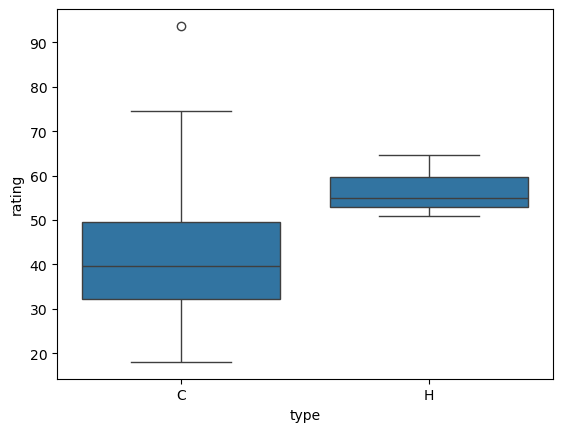

In [104]:
# boxplot of consumer rating vs type
sns.boxplot(x='type', y='rating', data=df)


<Axes: title={'center': 'rating'}, xlabel='type'>

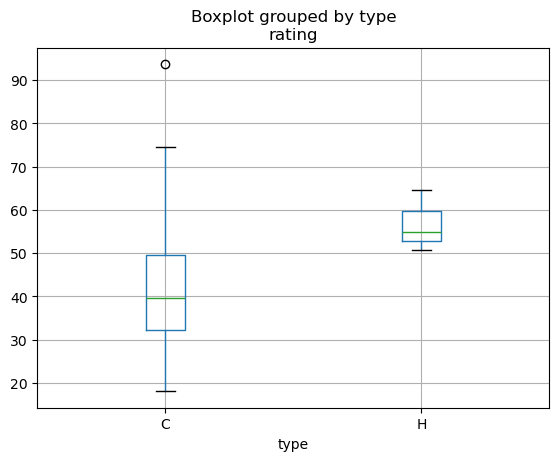

In [106]:
df.boxplot('rating','type')

As we can see, the boxplot() function plots boxplots for each cereal type in different colours to make it easily distinguishable. The cold type cereal has one outlier in the higher range and is right skewed with a wider distribution. The hot type cereal has no outliers and has a more or less normal distribution with a narrower distribution.

#### **Q9.** Is there a relation between sugars, calories, carbs, and fat?

To solve Question 9, use the pearson's correlation, as all the variables are continuous. To do this, we use the corr() function from the Pandas library.

In [66]:
# pearson's correlation value
corr = df[['sugars', 'calories', 'carbo', 'fat']].corr()
corr

,sugars,calories,carbo,fat
sugars,1.000000,0.574182,-0.501086,0.300664
calories,0.574182,1.000000,0.207331,0.510630
carbo,-0.501086,0.207331,1.000000,-0.311619
fat,0.300664,0.510630,-0.311619,1.000000


As we can see: 
*   The variables sugars and calories have a moderate degree of positive linear correlation, having correlation coefficient 0.57.
*   The variables sugars and carbo have a moderate degree of negative linear correlation, having correlation coefficient -0.50.
*   The variables sugars and fat have only the possibility of positive linear correlation, having correlation coefficient 0.30.
*   The variables calories and carbo have only the possibility of positive linear correlation, having correlation coefficient 0.21.
*   The variables calories and fat have a moderate degree of positive linear correlation, having correlation coefficient 0.51.
*   The variables carbo and fat have only the possibility of negative linear correlation, having correlation coefficient -0.31.

To visualize the correlation, we use the heatmap() function from the Seaborn library.

<Axes: >

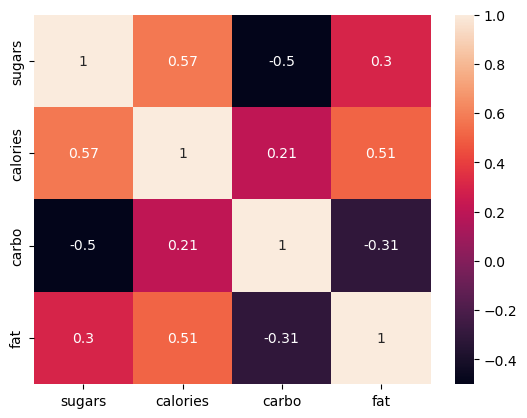

In [68]:
# visualizing
sns.heatmap(corr, annot=True)

As we can see: 
*   The variables sugars and calories have a moderate degree of positive linear correlation, having correlation coefficient 0.57.
*   The variables sugars and carbo have a moderate degree of negative linear correlation, having correlation coefficient -0.50.
*   The variables sugars and fat have only the possibility of positive linear correlation, having correlation coefficient 0.30.
*   The variables calories and carbo have only the possibility of positive linear correlation, having correlation coefficient 0.21.
*   The variables calories and fat have a moderate degree of positive linear correlation, having correlation coefficient 0.51.
*   The variables carbo and fat have only the possibility of negative linear correlation, having correlation coefficient -0.31.

To visualize the correlation, we also use the pairplot() function from the Seaborn library.

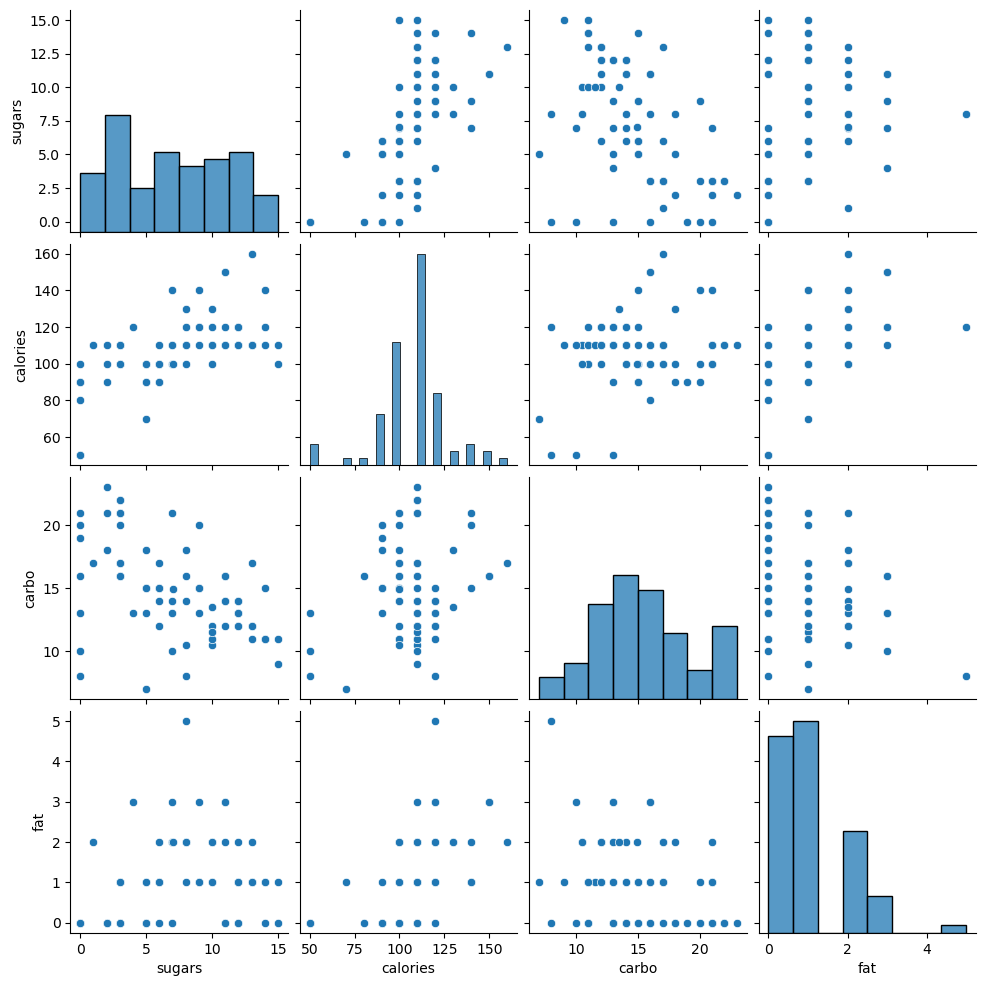

In [70]:
# visualization
sns.pairplot(df[['sugars', 'calories', 'carbo', 'fat']])

As we can see: 
*   The variables sugars and calories have a moderate degree of positive linear correlation.
*   The variables sugars and carbo have a moderate degree of negative linear correlation.
*   The variables sugars and fat have only the possibility of positive linear correlation.
*   The variables calories and carbo have only the possibility of positive linear correlation.
*   The variables calories and fat have a moderate degree of positive linear correlation.
*   The variables carbo and fat have only the possibility of negative linear correlation.

#### **Q10.** Which manufacturers produce cereal with highest calories?

To solve Question 10, we filter the dataframe with the condition that the calories observation matches the maximum value of calories. In this filtered dataframe, we check the observation in the mfr column.

In [72]:
# manufacturers with highest calories
df[df.calories==df.calories.max()].mfr

45    K
Name: mfr, dtype: object

As we can see, Kelloggs produces the cereal with the highest calories.

#### **Q11.** Use correlation tests and visualization to identify if the two variables calories and consumer rating associated ?

To solve Question 11, we use the ANOVA test, since one variable - calories is discrete and one variable - rating is continuous. Here, the Null Hypothesis is that the ratings are not affected by the calories (sample means are equal) and the Alternate Hypothesis is that the ratings are affected by the calories (sample means are not equal). To do so, we use the f_oneway() function from the SciPy Stats library and group the ratings by calories.

In [74]:
# anova test
F, p = stats.f_oneway(df[df.calories==50].rating, df[df.calories==70].rating, df[df.calories==80].rating, df[df.calories==90].rating, df[df.calories==100].rating, df[df.calories==110].rating, df[df.calories==120].rating, df[df.calories==130].rating, df[df.calories==140].rating, df[df.calories==150].rating, df[df.calories==160].rating)
print('F-critical: 2.79')
print('F-calculated: ', F)

F-critical: 2.79
F-calculated:  11.448496433877295


As we can see, the calculate F-statistic value is greater than the critical F-statistic value for the dof. Hence, we reject the Null Hypothesis and accept the Alternate Hypothesis which states that the variables calories and rating are associated.

To visualize the relation, we find the mean ratings of all the values of calories and then make a scatterplot using the scatterplot() function from the Seaborn library.

<Axes: >

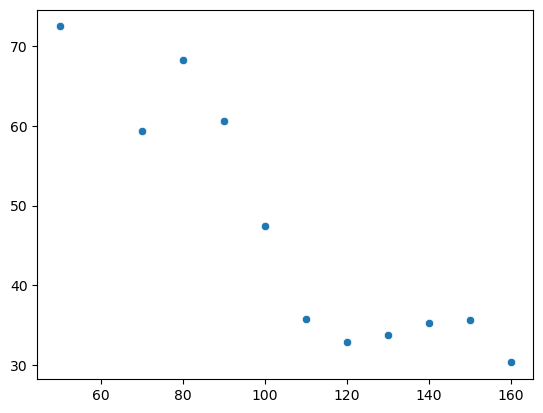

In [76]:
# visualization
ratings_mean = list(df.groupby(by='calories').rating.mean())
calories = list(df.calories.unique())
calories.sort()

sns.scatterplot(x=calories, y=ratings_mean)

As we can see, as the calories increase, the ratings decrease, indicating a negative correlation.

#### **Q12.** Use correlation tests and visualization to identify if the two variables shelf and calories associated?

To solve Question 12, we use the Chi-Squared Test, since the variables calories and shelf are discrete. Here the Null Hypothesis is that the variables are independent, and the Alternate Hypothesis is that they are dependent.

To do this, first we form a contingency table using the crosstab() function from the Pandas library.

In [78]:
# chi-square test
contingency = pd.crosstab(df.shelf, df.calories)
contingency

calories,50,70,80,90,100,110,120,130,140,150,160
shelf,,,,,,,,,,,
1,0,0,1,3,6,10,0,0,0,0,0
2,0,0,0,1,4,11,5,0,0,0,0
3,3,1,0,3,7,8,5,2,3,2,1


As we can see, on shelf:    
*  1, there are 1 80 cal, 3 90 cal, 6 100 cal, and 10 110 cal cereals.
*  2, there are 1 90 cal, 4 100 cal, 11 110 cal, and 5 120 cal cereals.
*  3, there are 3 50 cal, 1 70 cal, 3 90 cal, 7 100 cal, 8 110 cal, 5 120 cal, 2 130 cal, 3 140 cal, 2 150 cal, and 1 160 cal cereals.

<Axes: xlabel='calories', ylabel='shelf'>

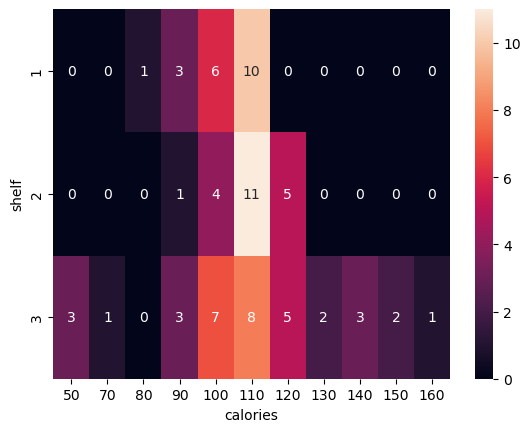

In [80]:
# visualization
sns.heatmap(contingency, annot=True)

As we can see, on shelf:    
*  1, there are 1 80 cal, 3 90 cal, 6 100 cal, and 10 110 cal cereals.
*  2, there are 1 90 cal, 4 100 cal, 11 110 cal, and 5 120 cal cereals.
*  3, there are 3 50 cal, 1 70 cal, 3 90 cal, 7 100 cal, 8 110 cal, 5 120 cal, 2 130 cal, 3 140 cal, 2 150 cal, and 1 160 cal cereals.

Next, we perform the Chi-Squared Test using the chi2_contingency() function from the SciPy Stats library. 

In [82]:
# chi-square test
c, p, dof, expected = stats.chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.12876294513924283


Since the p-value returned is more than 0.05, we reject the Null Hypothesis, and accept the Alternate Hypothesis that states that the variables shelf and calories are related.

#### **Q13.** Is there a relation between manufacturer and rating?

To solve Question 13, we use the ANOVA test, since one variable - manufacturer is categorical and one variable - rating is continuous. Here, the Null Hypothesis is that the ratings are not affected by the manufacturer (sample means are equal) and the Alternate Hypothesis is that the ratings are affected by the manufacturer (sample means are not equal). To do so, we use the f_oneway() function from the SciPy Stats library and group the ratings by manufacturer.

In [84]:
# anova test
F, p = stats.f_oneway(df[df.mfr=='A'].rating, df[df.mfr=='G'].rating, df[df.mfr=='K'].rating, df[df.mfr=='N'].rating, df[df.mfr=='P'].rating, df[df.mfr=='Q'].rating, df[df.mfr=='R'].rating)
print('F-critical: 2.22')
print('F-calculated: ', F)

F-critical: 2.22
F-calculated:  5.892057149371146


As we can see, the calculate F-statistic value is greater than the critical F-statistic value for the dof. Hence, we reject the Null Hypothesis and accept the Alternate Hypothesis which states that the variables manufacturer and rating are associated.

#### **Q14.** Which nutrients are essential for a good rating for a cereal?

To solve Question 14, we calculate the Pearson's correlation for the variables as all of them are continuous. To do this, we use the corr() function from the Pandas library.

In [86]:
# pearson's correlation
corr = df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber', 'rating']].corr()
corr

,protein,fat,carbo,vitamins,sodium,sugars,potass,fiber,rating
protein,1.000000,0.226913,-0.016296,NaN,-0.120710,-0.226812,0.671202,0.587843,0.466606
fat,0.226913,1.000000,-0.311619,NaN,-0.248478,0.300664,0.357102,0.135546,-0.418439
carbo,-0.016296,-0.311619,1.000000,NaN,0.444669,-0.501086,-0.093629,-0.109941,0.160944
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,-0.120710,-0.248478,0.444669,NaN,1.000000,-0.288453,-0.158369,-0.124328,-0.050622
sugars,-0.226812,0.300664,-0.501086,NaN,-0.288453,1.000000,0.029548,-0.000180,-0.774195
potass,0.671202,0.357102,-0.093629,NaN,-0.158369,0.029548,1.000000,0.791170,0.210422
fiber,0.587843,0.135546,-0.109941,NaN,-0.124328,-0.000180,0.791170,1.000000,0.335319
rating,0.466606,-0.418439,0.160944,NaN,-0.050622,-0.774195,0.210422,0.335319,1.000000


As we can see, the top 3 nutrients that affect the rating are sugars, protein and fat, having correlation coefficients -0.77 (high negative linear correlation), 0.46 (moderate positive linear correlation), and -0.41 (moderate negative linear correlation). The variable vitamin returns a NaN value, since after preprocessing, all the values turn to 25.

#### **Q15.** Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 70 ,30 split

To solve Question 15, we first split the data into dependent and independent variables x and y. x has the variables protein, fat, and sugars (from the previous question), and y has the variable rating.

In [88]:
# splitting dataset into dependent and independent variables
x = df[['protein', 'fat', 'sugars']]
y = df['rating']

Next, we split the dataset into training and testing sets. To do this, we use the train_test_split() method from the sklearn.model_selection library. Here we, fix the training size to be 0.7 and random_state to be 109 to maintain consistency.

In [90]:
# splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=109)

Finally, we use the LinearRegression method from the sklearn.linear_model library to design a linear regression model by training it on the training sets and then predicting the score on the testing set.

In [92]:
# training the model and calculating the score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8620479299423498

As we can see, our model has a score 0f 0.86, which is very high. Hence, the model has high explanatory power and the variables protein, fat and sugars can predict the rating accurately.